In [1]:
using CSV
using Dates
using DataFrames
using Gadfly

In [2]:
ENV["COLUMNS"] = 1000;

In [3]:
data = DataFrame(CSV.File("../rawdata/output_HHS_US_2021-02-27_one_column.csv"))
data.target_date = map(d -> Date(d, dateformat"m/d/y")+Year(2000), data.target_date)
data

,Column1,hospital_name,ccn,collection_week,fips_code,hospitalization_percentage,ICU_percentages,target_date,hospitalizations
,Int64,String,String?,String,Int64,Float64?,Float64?,Date,Float64?
1,10,PRATTVILLE BAPTIST HOSPITAL,10108,1/29/21,1001,1.0,0.189189,2021-02-03,3.40048
2,11,SOUTH BALDWIN REGIONAL MEDICAL CENTER,10083,1/29/21,1003,0.323413,0.406061,2021-02-03,4.03381
3,12,NORTH BALDWIN INFIRMARY,10129,1/29/21,1003,0.162858,0.348485,2021-02-03,2.03127
4,13,THOMAS HOSPITAL,10100,1/29/21,1003,0.513729,0.197026,2021-02-03,6.40756
5,14,MEDICAL CENTER BARBOUR,10069,1/29/21,1005,1.0,0.227273,2021-02-03,1.59001
6,15,BIBB MEDICAL CENTER,10058,1/29/21,1007,0.814815,0.0,2021-02-03,0.767816
7,16,ST VINCENTS BLOUNT,11305,1/29/21,1009,0.962963,0.0526316,2021-02-03,2.62851
8,17,BULLOCK COUNTY HOSPITAL,10110,1/29/21,1011,0.0,missing,2021-02-03,0.0
9,18,REGIONAL MEDICAL CENTER OF CENTRAL ALABAMA,10150,1/29/21,1013,0.962963,0.555556,2021-02-03,0.840803


In [4]:
mean(xs) = sum(xs) / length(xs);

In [5]:
isbad(x) = isnothing(x) || ismissing(x) || isinf(x) || isnan(x);
skipbad(xs) = filter(x -> !isbad(x), xs);

In [6]:
sum_vals(xs) = sum(skipbad(xs));
mean_vals(xs) = mean(skipbad(xs));

In [7]:
data_total = combine(groupby(data, :target_date), [
    "hospitalizations" => sum_vals => :admissions,
    :ICU_percentages => mean_vals => :icu_pct,
    :hospitalization_percentage => mean_vals => :hosp_pct,
])

,target_date,admissions,icu_pct,hosp_pct
,Date,Float64,Float64,Float64
1,2021-02-03,10661.9,0.221766,0.425923
2,2021-02-04,10547.4,0.221766,0.425923
3,2021-02-05,10480.0,0.221766,0.425923
4,2021-02-06,10297.4,0.221766,0.425923
5,2021-02-07,10140.9,0.221766,0.425923
6,2021-02-08,9759.21,0.221766,0.425923
7,2021-02-09,9936.83,0.221766,0.425923
8,2021-02-10,9903.97,0.221766,0.425923
9,2021-02-11,9793.95,0.221766,0.425923


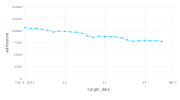

In [8]:
plot(
    data_total,
    x = :target_date,
    y = :admissions,
    Geom.point, Geom.line,
    Coord.cartesian(ymin=0),
    Scale.y_continuous(format=:plain),
    Guide.yticks(ticks=0:2500:15000),
) |> SVG(18cm, 10cm)